In [ ]:
#-----Data Collection------#

In [1]:
import pandas as pd

In [2]:
import numpy

In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv('salt_yield_dataset.csv')

In [5]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [6]:
dataset

,Pond_Area_m2,Brine_Density_g_cc,Evaporation_Days,Avg_Temperature_C,Climate_Temp_Range_C,Solar_Irradiance_W_m2,Salt_Yield_tons,Crystallization_Method_Continuous
0,2185.4,1.165,15.1,24.2,7.9,855.0,1.368,False
1,4778.2,1.208,18.4,20.5,7.2,414.8,2.438,False
2,3794.0,1.209,15.3,23.6,6.1,413.3,2.396,False
3,3194.0,1.217,12.7,31.7,10.8,594.2,2.467,False
4,1202.1,1.225,13.6,28.4,11.2,693.2,0.689,False
...,...,...,...,...,...,...,...,...
295,2850.1,1.203,16.1,37.4,14.1,800.9,2.486,False
296,3965.0,1.220,18.8,39.5,14.7,771.7,3.799,True
297,1471.2,1.176,36.9,39.4,13.2,678.1,1.219,False
298,3303.0,1.177,10.4,35.0,15.1,627.9,2.887,False


In [7]:
dataset.columns

Index(['Pond_Area_m2', 'Brine_Density_g_cc', 'Evaporation_Days',
       'Avg_Temperature_C', 'Climate_Temp_Range_C', 'Solar_Irradiance_W_m2',
       'Salt_Yield_tons', 'Crystallization_Method_Continuous'],
      dtype='object')

In [8]:
dataset=dataset.astype(int)

In [9]:
#------Input Output Split------#

In [10]:
independent=dataset[['Pond_Area_m2','Brine_Density_g_cc','Evaporation_Days','Avg_Temperature_C','Climate_Temp_Range_C',
             'Solar_Irradiance_W_m2','Crystallization_Method_Continuous']]

In [11]:
independent

,Pond_Area_m2,Brine_Density_g_cc,Evaporation_Days,Avg_Temperature_C,Climate_Temp_Range_C,Solar_Irradiance_W_m2,Crystallization_Method_Continuous
0,2185,1,15,24,7,855,0
1,4778,1,18,20,7,414,0
2,3794,1,15,23,6,413,0
3,3194,1,12,31,10,594,0
4,1202,1,13,28,11,693,0
...,...,...,...,...,...,...,...
295,2850,1,16,37,14,800,0
296,3965,1,18,39,14,771,1
297,1471,1,36,39,13,678,0
298,3303,1,10,35,15,627,0


In [12]:
dependent=dataset[['Salt_Yield_tons']]

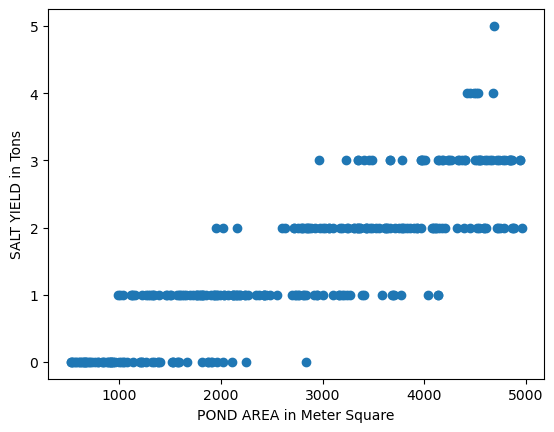

In [13]:
plt.scatter(dataset['Pond_Area_m2'],dataset['Salt_Yield_tons'])
plt.xlabel('POND AREA in Meter Square')
plt.ylabel('SALT YIELD in Tons')
plt.show()

In [14]:
#------Train Test Split------------#

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=1/3,random_state=0)

In [17]:
#------Standardization---------

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [19]:
#------Model Creation-----#

In [40]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\Users\rampr\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [41]:
regressor.intercept_

array([1.36006737])

In [42]:
regressor.n_support_

array([167], dtype=int32)

In [43]:
regressor.support_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  44,  48,  49,  50,  51,  52,  53,  54,  55,  57,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  82,  83,  84,  85,  86,
        87,  88,  90,  91,  92,  93,  94,  97,  98, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 114, 116, 117, 118, 119,
       120, 122, 123, 124, 125, 126, 129, 130, 131, 132, 133, 135, 136,
       137, 138, 139, 140, 141, 142, 144, 145, 146, 149, 150, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       168, 169, 170, 171, 172, 174, 175, 177, 178, 179, 180, 181, 183,
       184, 187, 188, 189, 191, 192, 193, 195, 197, 198, 199], dtype=int32)

In [44]:
#-----Substitute the values to find the Model Equation--------

In [45]:
y_pred=regressor.predict(X_test)

In [46]:
#-----Find R2-----------

In [47]:
from sklearn.metrics import r2_score

In [48]:
r_score=r2_score(y_test,y_pred)

In [49]:
r_score

0.6922175645681681

In [50]:
#---------Save the model-------------

In [51]:
import pickle

In [52]:
import numpy as np

In [53]:
filename='final_preinput_svm.sav'

In [54]:
pickle.dump(regressor,open(filename,'wb'))

In [55]:
preinput=sc.transform([[761.4,1.206,16.2,36.3,13.5,810,0]])

C:\Users\rampr\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
preinput

array([[-1.40147689,  0.206     , -0.77308399,  1.04233045,  0.82498389,
         0.56647757, -0.78288136]])

In [57]:
#------check result before deployment-------

In [61]:
loaded_model=pickle.load(open("final_preinput_svm.sav",'rb'))

In [62]:
result

array([0.10263141])